
$a_1+A_1 = M$
<br>
<br>
$a_2 + A_2 = N-M$
<br>
<br>
$w_{a_i} = 1+(a_i−1)s/N; i=1,2$  
<br>
$w_{A_i} = 1+a_is/N; i=1,2$
<br>
<br>
$$W_{a_i} = \frac{a_i w_{a_i}}{a_i w_{a_i}+A_i w_{A_i}}$$
<br>
$$W_{A_i} = \frac{A_i w_{A_i}}{a_i w_{a_i}+A_i w_{A_i}}$$
<br>
$$P(n_1+1,n_2) = f [(1-m_{12})W_{a_1}((1-\mu_a)\frac{a_1}{M}+\mu_A (1-\frac{a_1}{M}))(1-\frac{a_1}{M}) + m_{21}(\frac{a_2}{N-M})(1-\frac{a_1}{M})]$$

$$P(n_1-1,n_2) = f [(1-m_{12})W_{A_1}(\mu_a\frac{a_1}{M}+(1-\mu_A) (1-\frac{a_1}{M}))(\frac{a_1}{M}) + m_{21}(\frac{a_1}{M})(1-\frac{a_2}{N-M})]$$

$$P(n_1,n_2+1) = f [(1-m_{21})W_{a_2}((1-\mu_a)(\frac{a_2}{N-M})+\mu_A(1-\frac{a_2}{N-M}))(1-\frac{a_2}{N-M})+m_{12}(1-\frac{a_2}{N-M})(\frac{a_1}{M})]$$

$$P(n_1,n_2-1) = f [(1-m_{21})W_{A_2}(\mu_a(\frac{a_2}{N-M})+(1-\mu_A) (1-\frac{a_1}{N-M}))(\frac{a_2}{N-M})+m_{12}(\frac{a_2}{N-M})(1-\frac{a_1}{M})]$$


In [276]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
events = [
(+1,-1),
(-1,+1)]

events = np.asarray(events)
no_events = np.arange(0,2,1)


def Gillespie(size,maxtime,mu_a,mu_A,s,M,a0_1,a0_2,m12,m21):
    ns = 0
    time = 0
    N = 10000
    t = np.zeros(size)
    v1 = np.zeros((size, 2))
    v2 = np.zeros((size, 2))
    #v1 = vector of a1 and A1
    v1[(0, 0)] =a0_1
    v1[(0, 1)] =M-a0_1
    #v2 = vector of a2 and A2
    v2[(0, 0)] =a0_2
    v2[(0, 1)] =N-M-a0_2
    while time <= maxtime:
        
        wa1 = 1+( v1[(ns, 0)]-1)*s/M
        wA1 =1+( v1[(ns, 0)]*s/M)
        wa2 = 1+((v2[(ns, 0)]-1)*s/(N-M))
        wA2 =1+(v2[(ns, 0)]*s/(N-M))  
        
        z1 = (wa1*v1[(ns, 0)]/(v1[(ns, 0)]*wa1 + v1[(ns, 1)]*wA1))
        z2 = (wA1*v1[(ns, 1)]/(v1[(ns, 0)]*wa1 + v1[(ns, 1)]*wA1))
        z3 = (wa2*v2[(ns, 0)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        z4 = (wA2*v2[(ns, 1)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        rates = np.array([((1-m12)*z1*((1-mu_a)*(v1[(ns, 0)]/M)+mu_A*(1-(v1[(ns, 0)]/M)))* (1-(v1[(ns, 0)]/M))+m21*(v2[(ns, 0)]/(N-M))*(1-(v1[(ns, 0)]/M))),
                  ((1-m12)*z2*((mu_a)*(v1[(ns, 0)]/M)+(1-mu_A)*(1-(v1[(ns, 0)]/M)))* ((v1[(ns, 0)]/M))+m21*(v1[(ns, 0)]/M)*(1-(v2[(ns, 0)]/(N-M)))),
                  ((1-m21)*z3*((1-mu_a)*(v2[(ns, 0)]/(N-M))+mu_A*(1-(v2[(ns, 0)]/(N-M))))* (1-(v2[(ns, 0)]/(N-M)))+m12*(1-v2[(ns, 0)]/(N-M))*(v1[(ns, 0)]/M)),
                  ((1-m21)*z4*((mu_a)*(v2[(ns, 0)]/(N-M))+(1-mu_A)*(1- (v2[(ns, 0)]/(N-M))))*((v2[(ns, 0)]/(N-M)))+m12*(v2[(ns, 0)]/(N-M))*(1-(v1[(ns, 0)]/M)))])
                         
    
    
    
           
        total_rate  =  np.sum(rates)
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        if choose==0 or choose ==1:
            v1[ns+1]= v1[ns]+events[choose]
            v2[ns+1]=v2[ns]

        else:
            if choose == 2:
                v2[ns+1]= v2[ns]+events[0]
                v1[ns+1]=v1[ns]

            if choose == 3:
                v2[ns+1]= v2[ns]+events[1]
                v1[ns+1]=v1[ns]

        time   = time+dt
        t[ns+1]= t[ns]+dt
        ns= ns+1
        if ns == size-1:
            break
 
 

        

    return t[0:ns], v1[0:ns],v2[0:ns]


In [277]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from numba import jit
import numba as nb
events = [
(+1,-1),
(-1,+1)]

events = np.asarray(events)
no_events = np.arange(0,2,1)


def Gillespie_m0(size,maxtime,mu_a,mu_A,s,a0_2):
    ns = 0
    time = 0
    N = 10000
    t = np.zeros(size)
    v2 = np.zeros((size, 2))

    #v2 = vector of a2 and A2
    v2[(0, 0)] =a0_2
    v2[(0, 1)] =N-a0_2
    while time <= maxtime:

        wa2 = 1+((v2[(ns, 0)]-1)*s/(N))
        wA2 =1+(v2[(ns, 0)]*s/(N))  
        
        z3 = (wa2*v2[(ns, 0)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        z4 = (wA2*v2[(ns, 1)]/(v2[(ns, 0)]*wa2 + v2[(ns, 1)]*wA2))
        rates = np.array([
                  z3*((1-mu_a)*(v2[(ns, 0)]/(N))+mu_A*(1-(v2[(ns, 0)]/(N))))* (1-(v2[(ns, 0)]/(N))),
                  z4*((mu_a)*(v2[(ns, 0)]/(N))+(1-mu_A)*(1- (v2[(ns, 0)]/(N))))*((v2[(ns, 0)]/(N)))])
                         
           
        total_rate  =  np.sum(rates)
        
        dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
        choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]
        v2[ns+1]= v2[ns]+events[choose]

        time   = time+dt
        t[ns+1]= t[ns]+dt
        ns= ns+1
        if ns == size-1:
            break
 
    return t[0:ns],v2[0:ns]


In [278]:
t_m0,v2_m_0 = Gillespie_m0(size=1000000,maxtime=10000000,mu_a=0.01,mu_A=0.01, s=0.01, a0_2 =5000)

<ipython-input-277-99d36e502d85>:39: RuntimeWarning: divide by zero encountered in double_scalars
  dt = -math.log(1 - random.uniform(0.0, 1.0)) / total_rate
<ipython-input-277-99d36e502d85>:40: RuntimeWarning: invalid value encountered in true_divide
  choose = np.searchsorted(np.cumsum(rates/total_rate), np.random.rand(1))[0]


In [279]:
t_M50,v1_M50,v2_M50 = Gillespie(size=1000000,maxtime=100000,mu_a=0.01,mu_A=0.01, s=0.01, M=50,a0_1=10, a0_2 =10,m12=2,m21=2)
t_M500,v1_M500,v2_M500 = Gillespie(size=1000000,maxtime=100000,mu_a=0.01,mu_A=0.01, s=0.01, M=500,a0_1=10, a0_2 =10,m12=2,m21=2)
t_M5000,v1_M5000,v2_M5000 = Gillespie(size=1000000,maxtime=100000,mu_a=0.01,mu_A=0.01, s=0.01, M=5000,a0_1=10, a0_2 =10,m12=2,m21=2)




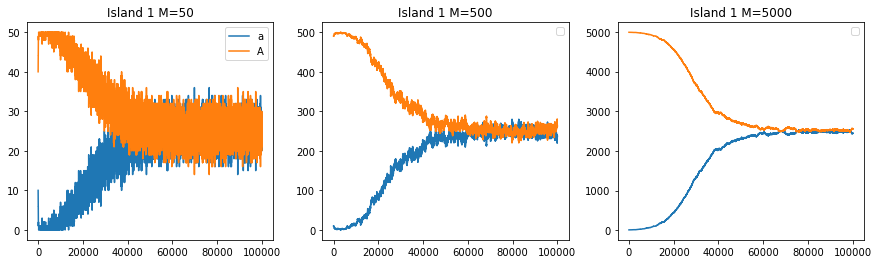

In [280]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.plot(t_M50,v1_M50[:,[0]])
plt.plot(t_M50,v1_M50[:,[1]])
plt.legend(['a', 'A']);
plt.title('Island 1 M=50');
plt.subplot(1, 3, 2)
plt.legend(['a', 'A']);
plt.title('Island 1 M=500');
plt.plot(t_M500,v1_M500[:,[0]])
plt.plot(t_M500,v1_M500[:,[1]])
plt.subplot(1, 3, 3)
plt.legend(['a', 'A']);
plt.title('Island 1 M=5000');
plt.plot(t_M5000,v1_M5000[:,[0]])
plt.plot(t_M5000,v1_M5000[:,[1]]);


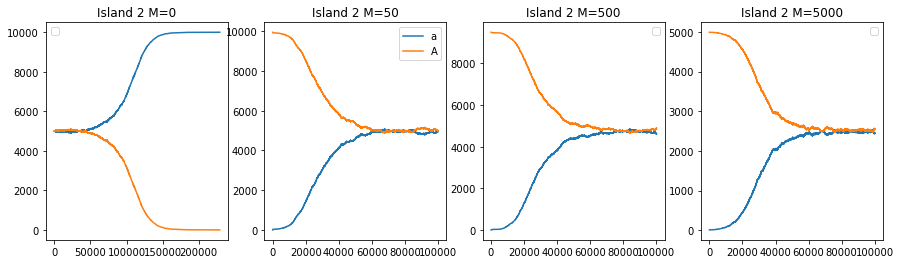

In [281]:
plt.figure(figsize=(15,4))
plt.subplot(1, 4, 1)
plt.legend(['a', 'A']);
plt.title('Island 2 M=0');
plt.plot(t_m0,v2_m_0[:,[0]])
plt.plot(t_m0,v2_m_0[:,[1]])
plt.subplot(1, 4, 2)
plt.plot(t_M50,v2_M50[:,[0]])
plt.plot(t_M50,v2_M50[:,[1]])
plt.legend(['a', 'A']);
plt.title('Island 2 M=50');
plt.subplot(1, 4, 3)
plt.legend(['a', 'A']);
plt.title('Island 2 M=500');
plt.plot(t_M500,v2_M500[:,[0]])
plt.plot(t_M500,v2_M500[:,[1]])
plt.subplot(1, 4, 4)
plt.legend(['a', 'A']);
plt.title('Island 2 M=5000');
plt.plot(t_M5000,v1_M5000[:,[0]])
plt.plot(t_M5000,v1_M5000[:,[1]]);
